## 0\. Background

*   We will be working with the Pima Indian Diabetes Dataset that can be downloaded from the following Kaggle link

https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database


Import Libraries

In [1]:
import numpy as np
import pandas as pd
from pandas import read_csv

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

import sklearn.model_selection
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

## 1\. Load the Dataset into a Pandas DataFrame and perform simple exploration of the dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Project Directory path
project_dir = 'drive/MyDrive/UW.8740/Week 04 - Model Selection/'

In [4]:
diabetes = pd.read_csv(project_dir+ 'diabetes.csv')
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# check for nulls
diabetes.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
# check for duplicate rows
diabetes.duplicated().sum()

0

In [8]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
# check for correlation
diabetes.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


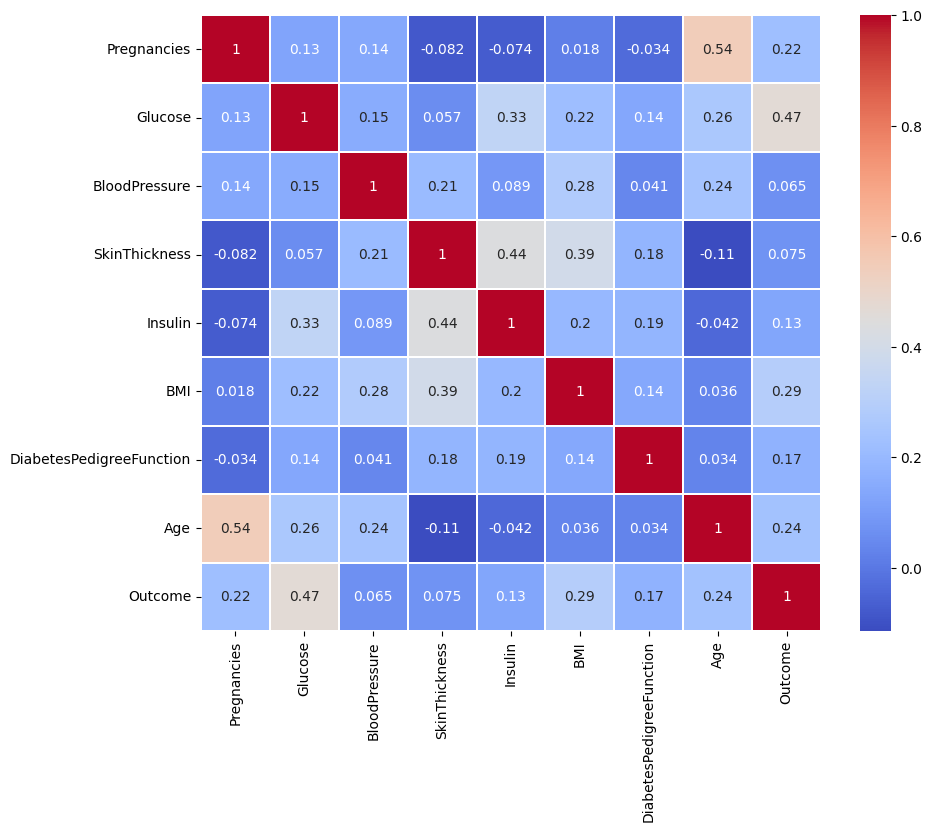

In [10]:
# visualize correlation with a heatmap

fig,ax=plt.subplots(figsize=(10,8))
sns.heatmap(diabetes.corr(), annot=True, cmap='coolwarm', linewidths=0.004)
plt.show()

<font color="red"><h1> We can see from the above heatmap that Glucose is has the highest correlation with Diabetic outcome</h1></font>



## 2\.Train/Test Split

In [11]:
diabetes.values

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [12]:
diabetes.values.shape

(768, 9)

In [13]:
diabetes.values[:,0:8]

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [14]:
diabetes.values[:,8]

array([1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 0., 0.

In [15]:
diabetes.values[:,-1]

array([1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 0., 0.

In [16]:
X = diabetes.values[:,0:8]
y = diabetes.values[:,8]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

## 3\. Model Selection and Optimization

### 3\.1 Loop through the models directly without optimization and check accuracy metrics

In [18]:
# get a list of available accuracy metrics from SKLearn
sklearn.metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

In [19]:
# create a list of models we want to loop through
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier()))

In [20]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = KFold(n_splits=10, random_state=7, shuffle=True)
	cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)


LR: 0.770865 (0.050905)
LDA: 0.766969 (0.047966)
KNN: 0.710988 (0.050792)
CART: 0.696770 (0.050238)
NB: 0.759142 (0.038960)
SVM: 0.760458 (0.034712)
RF: 0.772129 (0.057677)


In [21]:
# evaluate each model in turn
results = []
names = []
scoring = 'roc_auc'
for name, model in models:
	kfold = KFold(n_splits=10, random_state=7, shuffle=True)
	cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)


LR: 0.825763 (0.050055)
LDA: 0.830384 (0.046524)
KNN: 0.725372 (0.062930)
CART: 0.650771 (0.055092)
NB: 0.812392 (0.049165)
SVM: 0.814956 (0.043043)
RF: 0.816616 (0.050340)


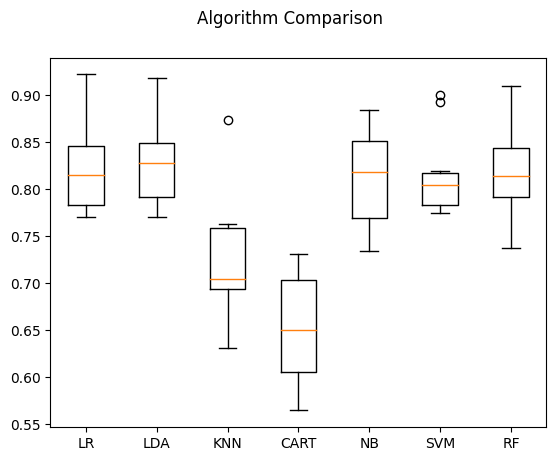

In [22]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

<font color="red"><h1> Observe that using PyCaret and looping through the models directly results in close accuracy results, but not identical</h1></font>




### 3\.2 Optimize a single model using Grid Search Cross Validation

In [40]:
clf_rf = RandomForestClassifier(class_weight='balanced')
param_grid_rf = { 'bootstrap': [True],
                  'max_depth': [50, 70, 80, 90, 100],
                  'min_samples_split':[10, 12,15,20],
                  'min_samples_leaf': [4, 5, 10],
                  'n_estimators': [1000,1200,1500,2000],
                  'max_leaf_nodes': [8, 16]
                 }

In [41]:
from sklearn.model_selection import RandomizedSearchCV
grid_rf = RandomizedSearchCV(clf_rf,
                             param_grid_rf,
                             cv=5, scoring='roc_auc',
                             verbose = 2)
grid_rf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END bootstrap=True, max_depth=80, max_leaf_nodes=16, min_samples_leaf=10, min_samples_split=20, n_estimators=2000; total time=   6.8s
[CV] END bootstrap=True, max_depth=80, max_leaf_nodes=16, min_samples_leaf=10, min_samples_split=20, n_estimators=2000; total time=   5.5s
[CV] END bootstrap=True, max_depth=80, max_leaf_nodes=16, min_samples_leaf=10, min_samples_split=20, n_estimators=2000; total time=   4.8s
[CV] END bootstrap=True, max_depth=80, max_leaf_nodes=16, min_samples_leaf=10, min_samples_split=20, n_estimators=2000; total time=   3.5s
[CV] END bootstrap=True, max_depth=80, max_leaf_nodes=16, min_samples_leaf=10, min_samples_split=20, n_estimators=2000; total time=   3.5s
[CV] END bootstrap=True, max_depth=50, max_leaf_nodes=8, min_samples_leaf=10, min_samples_split=12, n_estimators=1000; total time=   2.1s
[CV] END bootstrap=True, max_depth=50, max_leaf_nodes=8, min_samples_leaf=10, min_samples_split=12, n_esti

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(class_weight='balanced'),
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [50, 70, 80, 90, 100],
                                        'max_leaf_nodes': [8, 16],
                                        'min_samples_leaf': [4, 5, 10],
                                        'min_samples_split': [10, 12, 15, 20],
                                        'n_estimators': [1000, 1200, 1500,
                                                         2000]},
                   scoring='roc_auc', verbose=2)

In [25]:
print (grid_rf.best_score_)
print (grid_rf.best_params_)
print (grid_rf.best_estimator_)

0.8297084994781491
{'n_estimators': 1200, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_leaf_nodes': 16, 'max_features': 'log2', 'max_depth': 100, 'bootstrap': True}
RandomForestClassifier(class_weight='balanced', max_depth=100,
                       max_features='log2', max_leaf_nodes=16,
                       min_samples_leaf=4, min_samples_split=10,
                       n_estimators=1200)


In [26]:
y_test_pred = grid_rf.predict(X_test)
print(f'Area under ROC curve: {roc_auc_score(y_test, y_test_pred): 0.4f}')
print(f'Accuracy {accuracy_score(y_test, y_test_pred): 0.4f}')
print(f'Weigted F1 score {f1_score(y_test, y_test_pred, average="weighted"): 0.4f}')
print(classification_report(y_test, y_test_pred, digits=4))
pd.DataFrame(confusion_matrix(y_test, y_test_pred))

Area under ROC curve:  0.7656
Accuracy  0.7857
Weigted F1 score  0.7872
              precision    recall  f1-score   support

         0.0     0.8500    0.8252    0.8374       103
         1.0     0.6667    0.7059    0.6857        51

    accuracy                         0.7857       154
   macro avg     0.7583    0.7656    0.7616       154
weighted avg     0.7893    0.7857    0.7872       154



,0,1
0,85,18
1,15,36


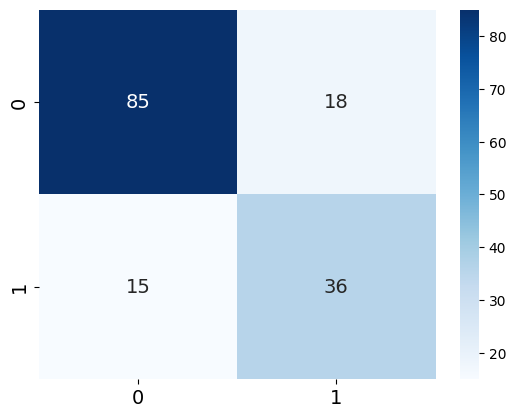

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

fontsize = 14

sns.heatmap(confusion_matrix(y_test,y_test_pred),
            annot=True, cmap = 'Blues',
            annot_kws={"size": fontsize})

plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)

plt.show()

<font color="red"><h1> The training accuracy is better than the test accuracy, what does that mean?</h1></font>




### 3\.3 Optimize a single model using Grid Search Cross Validation with a different set of parameter search terms

In [28]:
param_grid_rf = [{'n_estimators': [25, 50],
                     'max_features': [15, 20],
                     'max_leaf_nodes': [8, 16]}] # hyperparameters to tune


grid_rf = RandomizedSearchCV(clf_rf,
                             param_grid_rf,
                             cv=5, scoring='roc_auc',
                             n_jobs = -1, verbose = 2)
grid_rf.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(class_weight='balanced'),
                   n_jobs=-1,
                   param_distributions=[{'max_features': [15, 20],
                                         'max_leaf_nodes': [8, 16],
                                         'n_estimators': [25, 50]}],
                   scoring='roc_auc', verbose=2)

In [29]:
print (grid_rf.best_score_)
print (grid_rf.best_params_)
print (grid_rf.best_estimator_)

0.828189110712661
{'n_estimators': 50, 'max_leaf_nodes': 8, 'max_features': 15}
RandomForestClassifier(class_weight='balanced', max_features=15,
                       max_leaf_nodes=8, n_estimators=50)


In [30]:
y_test_pred = grid_rf.predict(X_test)
print(f'Area under ROC curve: {roc_auc_score(y_test, y_test_pred): 0.4f}')
print(f'Accuracy {accuracy_score(y_test, y_test_pred): 0.4f}')
print(f'Weigted F1 score {f1_score(y_test, y_test_pred, average="weighted"): 0.4f}')
print(classification_report(y_test, y_test_pred, digits=4))
pd.DataFrame(confusion_matrix(y_test, y_test_pred))

Area under ROC curve:  0.7607
Accuracy  0.7792
Weigted F1 score  0.7812
              precision    recall  f1-score   support

         0.0     0.8485    0.8155    0.8317       103
         1.0     0.6545    0.7059    0.6792        51

    accuracy                         0.7792       154
   macro avg     0.7515    0.7607    0.7555       154
weighted avg     0.7843    0.7792    0.7812       154



,0,1
0,84,19
1,15,36


In [31]:
rf = RandomForestClassifier(class_weight='balanced')
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

In [32]:
y_test_pred = rf.predict(X_test)
print(f'Area under ROC curve: {roc_auc_score(y_test, y_test_pred): 0.4f}')
print(f'Accuracy {accuracy_score(y_test, y_test_pred): 0.4f}')
print(f'Weigted F1 score {f1_score(y_test, y_test_pred, average="weighted"): 0.4f}')
print(classification_report(y_test, y_test_pred, digits=4))
pd.DataFrame(confusion_matrix(y_test, y_test_pred))

Area under ROC curve:  0.7507
Accuracy  0.7857
Weigted F1 score  0.7840
              precision    recall  f1-score   support

         0.0     0.8302    0.8544    0.8421       103
         1.0     0.6875    0.6471    0.6667        51

    accuracy                         0.7857       154
   macro avg     0.7588    0.7507    0.7544       154
weighted avg     0.7829    0.7857    0.7840       154



,0,1
0,88,15
1,18,33


### 3\.4 Explore tuning a single parameter

In [33]:
from sklearn.metrics import accuracy_score

test_scores, train_scores = [], []
for i in [1, 2, 3, 4, 5, 10, 20, 50]:
    rf = RandomForestClassifier(n_estimators=i, random_state=1111)
    rf.fit(X_train, y_train)
    # Create predictions for the X_train and X_test datasets.
    train_predictions = rf.predict(X_train)
    test_predictions = rf.predict(X_test)
    # Append the accuracy score for the test and train predictions.
    train_scores.append(round(accuracy_score(y_train, train_predictions), 2))
    test_scores.append(round(accuracy_score(y_test, test_predictions), 2))
# Print the train and test scores.
print("The n_estimators: {}".format(i))
print("The training scores were: {}".format(train_scores))
print("The testing scores were: {}".format(test_scores))

The n_estimators: 50
The training scores were: [0.88, 0.87, 0.95, 0.95, 0.97, 0.98, 1.0, 1.0]
The testing scores were: [0.66, 0.71, 0.74, 0.75, 0.76, 0.75, 0.75, 0.76]


<font color="red"><h1> What is the ideal value of n_estimators based on this search alone</h1></font>


In [34]:
# get model parameters
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1111,
 'verbose': 0,
 'warm_start': False}

In [35]:
# represent model parameters in a DataFrame
pd.DataFrame.from_dict(rf.get_params(), orient='index', columns=['Value'])

,Value
bootstrap,True
ccp_alpha,0.0
class_weight,None
criterion,gini
max_depth,None
max_features,sqrt
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_samples_leaf,1


In [36]:
rf.class_weight

In [37]:
y_test_pred = rf.predict(X_test)
y_test_pred

array([1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0.,
       1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       0.])

In [38]:
# Print out count of binary predictions
print(pd.Series(y_test_pred).value_counts())

0.0    114
1.0     40
dtype: int64


In [39]:
# Print prediction probabilities for each class per row
# Notice that the pair of prediction probabilities add up to one
y_test_pred_proba = rf.predict_proba(X_test)
y_test_pred_proba

array([[0.48, 0.52],
       [0.48, 0.52],
       [0.9 , 0.1 ],
       [0.54, 0.46],
       [0.98, 0.02],
       [0.96, 0.04],
       [0.74, 0.26],
       [0.4 , 0.6 ],
       [0.18, 0.82],
       [0.96, 0.04],
       [0.4 , 0.6 ],
       [0.62, 0.38],
       [0.5 , 0.5 ],
       [0.38, 0.62],
       [0.7 , 0.3 ],
       [0.98, 0.02],
       [0.8 , 0.2 ],
       [0.74, 0.26],
       [0.56, 0.44],
       [0.6 , 0.4 ],
       [0.12, 0.88],
       [0.86, 0.14],
       [0.94, 0.06],
       [0.9 , 0.1 ],
       [0.6 , 0.4 ],
       [0.96, 0.04],
       [0.8 , 0.2 ],
       [0.78, 0.22],
       [0.68, 0.32],
       [0.98, 0.02],
       [0.9 , 0.1 ],
       [0.92, 0.08],
       [0.32, 0.68],
       [0.84, 0.16],
       [0.24, 0.76],
       [0.88, 0.12],
       [0.66, 0.34],
       [0.22, 0.78],
       [0.82, 0.18],
       [0.62, 0.38],
       [0.74, 0.26],
       [0.92, 0.08],
       [0.34, 0.66],
       [0.88, 0.12],
       [0.68, 0.32],
       [0.94, 0.06],
       [0.88, 0.12],
       [0.34,